In [349]:
'''Description of proposal: 
The role of machine learning and artificial intelligence is growing rapidly in many 
aspects of drug discovery. These include: computational techniques such as 
structure-based and ligand-based models for virtual screening to identify 
compounds that bind to the target(s) of interest; in silico toxicology and adverse 
drug-drug interaction prediction; and generative methods in de novo drug design. 
This project will focus on virtual screening, developing models to help discover 
new lead compounds and potential drugs, by classifying whether a small molecule 
will bind to a therapeutic protein target; and regression models to predict how 
tightly a compound will bind to a protein. You will develop models that will be 
benchmarked against publicly-available datasets, such as DUD-E, DEKOIS 2.0, 
(classification) and PDBbind (regression).'''

'Description of proposal: \nThe role of machine learning and artificial intelligence is growing rapidly in many \naspects of drug discovery. These include: computational techniques such as \nstructure-based and ligand-based models for virtual screening to identify \ncompounds that bind to the target(s) of interest; in silico toxicology and adverse \ndrug-drug interaction prediction; and generative methods in de novo drug design. \nThis project will focus on virtual screening, developing models to help discover \nnew lead compounds and potential drugs, by classifying whether a small molecule \nwill bind to a therapeutic protein target; and regression models to predict how \ntightly a compound will bind to a protein. You will develop models that will be \nbenchmarked against publicly-available datasets, such as DUD-E, DEKOIS 2.0, \n(classification) and PDBbind (regression).'

In [350]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [351]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [352]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [353]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [354]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [355]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# drugsComTest_raw.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'drugsComTest_raw.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [356]:
df1.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


C:\Users\d\AppData\Local\Temp/ipykernel_3460/1240019916.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


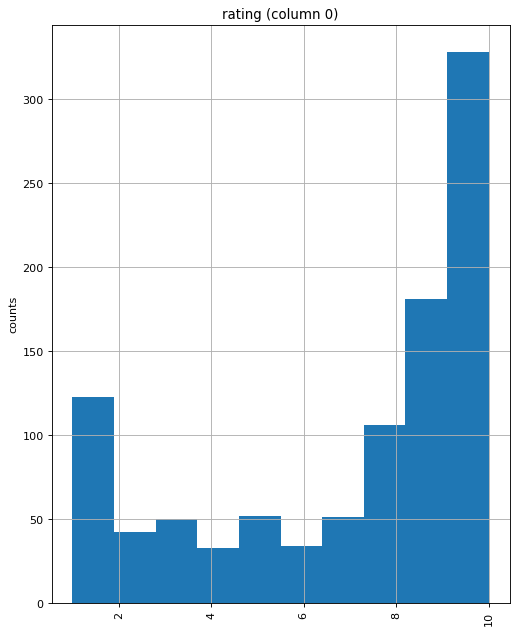

In [357]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\d\AppData\Local\Temp/ipykernel_3460/128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


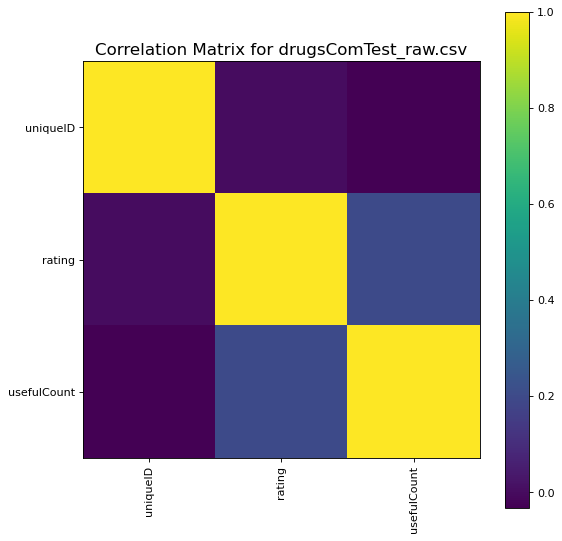

In [358]:
plotCorrelationMatrix(df1, 8)

C:\Users\d\AppData\Local\Temp/ipykernel_3460/950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


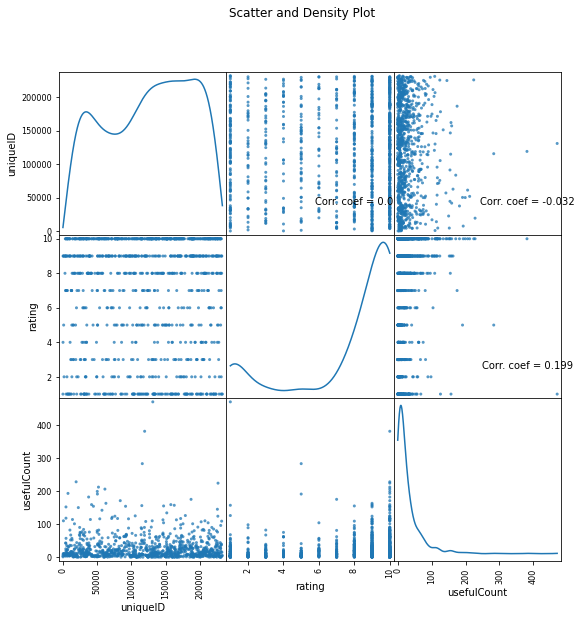

In [359]:
plotScatterMatrix(df1, 9, 10)

In [360]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# drugsComTrain_raw.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTrain_raw.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'drugsComTrain_raw.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [361]:
df2.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


C:\Users\d\AppData\Local\Temp/ipykernel_3460/1240019916.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


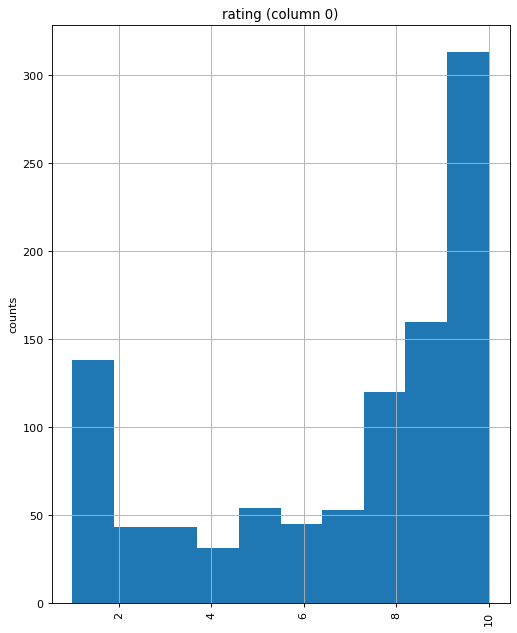

In [362]:
plotPerColumnDistribution(df2, 10, 5)

C:\Users\d\AppData\Local\Temp/ipykernel_3460/128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


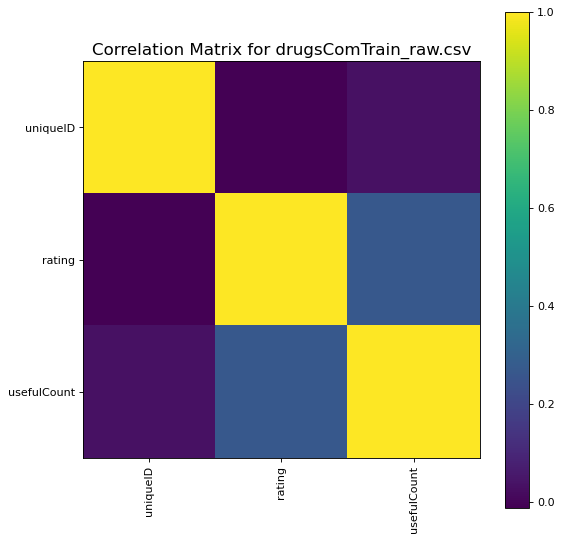

In [363]:
plotCorrelationMatrix(df2, 8)

C:\Users\d\AppData\Local\Temp/ipykernel_3460/950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


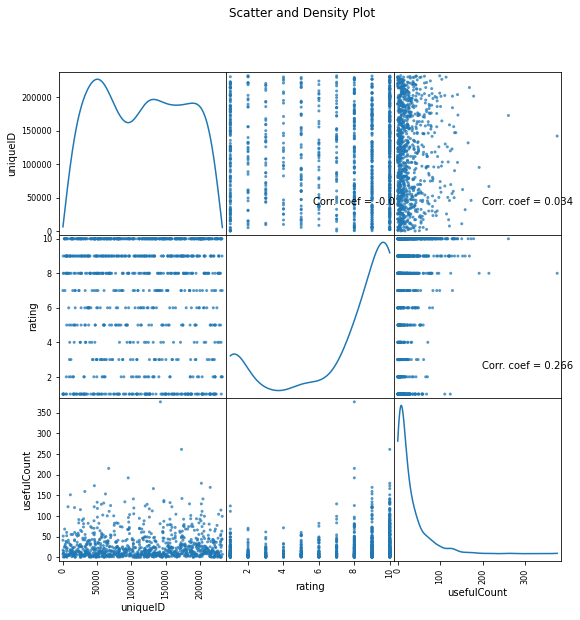

In [364]:
plotScatterMatrix(df2, 9, 10)

In [365]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [366]:
# import pandas
import pandas as pd

# Read the data using csv
data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTrain_raw.csv')

# See initial 5 records
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [367]:
# See last 5 records 
data.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


In [368]:
# Print list of columns in the data
print(data.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [369]:
# Print the shape of a DataFrame
print(data.shape)

(161297, 7)


In [370]:
# Check the information of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [371]:
# Check the descriptive statistics
data.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [372]:
# Filter columns
data.filter(['uniquelID', 'rating'])

,rating
0,9
1,8
2,5
3,8
4,9
...,...
161292,10
161293,1
161294,2
161295,10


In [373]:
# Filter column "name"
data['rating']

0          9
1          8
2          5
3          8
4          9
          ..
161292    10
161293     1
161294     2
161295    10
161296     9
Name: rating, Length: 161297, dtype: int64

In [374]:
# Filter column "name"
data[['rating']]

,rating
0,9
1,8
2,5
3,8
4,9
...,...
161292,10
161293,1
161294,2
161295,10


In [375]:
# Filter two columns: usefulCount and drugName
data[['usefulCount', 'drugName']]

,usefulCount,drugName
0,27,Valsartan
1,192,Guanfacine
2,17,Lybrel
3,10,Ortho Evra
4,37,Buprenorphine / naloxone
...,...,...
161292,125,Campral
161293,34,Metoclopramide
161294,35,Orencia
161295,79,Thyroid desiccated


In [376]:
# Select rows for the specific index
data.filter([0, 1, 2], axis=0)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17


In [377]:
# Filter data using slicing
data[2:5]

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [378]:
# Filter data for specific value
data[data.condition=='Weight Loss']

,uniqueID,drugName,condition,review,rating,date,usefulCount
178,164952,Phentermine / topiramate,Weight Loss,"""I have been on the Qysmia for 3 weeks now. I...",8,25-Dec-15,38
254,145900,Qsymia,Weight Loss,"""My Dr agreed to over see putting me on Qsymia...",9,24-Feb-13,46
280,52117,Adipex-P,Weight Loss,"""I just started Adipex-P 37.5mg on March 6th, ...",8,10-Mar-11,7
380,145785,Qsymia,Weight Loss,"""Began taking Qsymia 3.75 in June 2013. Its on...",10,26-May-14,61
408,145840,Qsymia,Weight Loss,"""Made me jittery and could not sleep. Lost wei...",1,21-Aug-13,59
...,...,...,...,...,...,...,...
161031,145579,Qsymia,Weight Loss,"""You may lose weight, but you will probably lo...",3,19-May-16,48
161080,128296,Phentermine,Weight Loss,"""I began taking Adipex 8/2014 &amp; by 10/2015...",10,5-Jan-16,23
161121,185393,Saxenda,Weight Loss,"""I started my injections on the 22nd of July, ...",10,5-Aug-17,7
161172,39213,Contrave,Weight Loss,"""Today marks the first day of my 3rd week - 2 ...",5,13-Apr-17,3


In [379]:
# Select data for multiple values
data[data.isin(['uniquelID', 'rating'])]

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
161292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161295,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
# Filter drug who has more than 5
data[(data.rating >= 5)]

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161290,103458,Tekturna,High Blood Pressure,"""I have only been on Tekturna for 9 days. The ...",7,7-Feb-10,18
161291,164345,Junel 1.5 / 30,Birth Control,"""This would be my second month on Junel. I&#03...",6,27-May-15,0
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [381]:
# Filter rating what has more than 5 and less 7 rating
data[(data.rating >=5) & (data.rating < 7)]

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
28,132258,Ativan,Panic Disorde,"""Honestly, I have been taking ativan for 2 yea...",6,1-Jun-15,47
43,12056,Metaxalone,Muscle Spasm,"""I have been taking this medicine due to lower...",5,4-Jun-14,55
60,131704,Effexor XR,Anxiety,"""Was on this med for 5 years. Worked fine but ...",6,27-Dec-16,23
64,60156,NuvaRing,Birth Control,"""I was off birth control for a while consideri...",5,18-Apr-13,9
...,...,...,...,...,...,...,...
161253,131713,Effexor XR,Generalized Anxiety Disorde,"""I started to take this med one week ago for m...",5,16-Nov-16,19
161266,8477,Zolpidem,Insomnia,"""Zolpidem does work fast. However, I have a ri...",5,6-Apr-12,1
161272,88991,Singulair,Asthma,"""This really did help with my allergies and as...",5,21-Sep-12,36
161273,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0


In [382]:
# Filter rating what has more than 5
data.query('rating<5')

,uniqueID,drugName,condition,review,rating,date,usefulCount
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
12,191290,Pentasa,Crohn's Disease,"""I had Crohn&#039;s with a resection 30 years ...",4,6-Jul-13,8
13,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4,7-Sep-17,1
...,...,...,...,...,...,...,...
161285,200957,Alcaftadine,"Conjunctivitis, Allergic","""Used this a month ago for allergic conjunctiv...",1,21-Sep-14,12
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33
161289,105263,Carbamazepine,Trigeminal Neuralgia,"""Up to 800mg seems to work about once every 2n...",1,31-Jan-16,10
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34


In [383]:
# Drop missing value rows using dropna () function
# Read the data

data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTrain_raw.csv')
data = data.dropna ()
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [384]:
# Read the data
data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTrain_raw.csv')

# Fill all the missing values in the rating column with mean of the rating
data['rating']=data.rating.fillna (data.rating.mean ())
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [385]:
# Fill all the missing values in the usefulCount column with a median of the usefulCount column
data['usefulCount']=data.usefulCount.fillna(data.usefulCount.median())
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [386]:
# Fill all the missing values in the condition column (category column) with the mode of the condition column
data['condition']=data['condition'].fillna(data['condition'].mode() [0])
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [387]:
# Dropping the outliers using Standard Deviation
# Read the data
data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv')

# Dropping the outliers using Standard Deviation
upper_limit = data['usefulCount'].mean () + 3 * data['usefulCount'].std ()
lower_limit = data['usefulCount'].mean () - 3 * data['usefulCount'].std ()
data = data[(data['usefulCount'] < upper_limit) & (data['usefulCount'] > lower_limit)]
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [388]:
# Read the data 
data =  pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv')

# Drop the outlier observations using Percentiles
upper_limit = data['usefulCount'].quantile(.99)
lower_limit = data['usefulCount'].quantile(.01)
data =data[(data['usefulCount'] < upper_limit) & (data['usefulCount'] > lower_limit)]
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [389]:
# Read the data 
data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv')
# Dummy encoding
encoded_data = pd.get_dummies(data['drugName'])

# Join the encoded data with original dataframe
data = data.join(encoded_data)

# Check the top-5 records of the dataframe
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,A / B Otic,Abacavir / dolutegravir / lamivudine,Abacavir / lamivudine,...,Zyprexa Zydis,Zyrtec,Zyrtec-D,Zytiga,Zyvox,ZzzQuil,depo-subQ provera 104,ella,femhrt,pHisoHex
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
# Import one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Initialize the one-hot encoder object
onehotencoder = OneHotEncoder ()

# Fill all the missing values in drugName column (category column) with mode of  drugName column
data['drugName']=data['drugName'].fillna(data['drugName'].mode () [0])

# Fit and transforms the drugName column
onehotencoder.fit_transform(data[['drugName']]).toarray ()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [391]:
# Import pandas 
import pandas as pd

# Read the data
data=pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv')

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate the Label Encoder Object
label_encoder = LabelEncoder ()

# Fit and transform the column
encoded_data = label_encoder.fit_transform(data['drugName'])

# Print the encoded
print(encoded_data)

[1561 1489  294 ... 1349 2268  217]


In [392]:
# Perfrom inverse encoding 
inverse_encode=label_encoder.inverse_transform([1561, 1489,  294, 1349, 2268, 217])

# Print inverse encode
print (inverse_encode)

['Mirtazapine' 'Mesalamine' 'Bactrim' 'Levonorgestrel' 'Tapentadol'
 'Arthrotec']


In [393]:
# Import pandas and OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Load the data
data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv')

# Initialize OrdinalEncoder with order
order_encoder=OrdinalEncoder(categories=['drugName'])

# fit and transform the grade
data['drugName_encoded'] = label_encoder.fit_transform(data['drugName'])

# Check top-5 records of the dataframe
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_encoded
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1561
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1489
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,294
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,593
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,622


In [394]:
# Import StandardScaler (or z-score normalization)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler ()

# To scale data
scaler.fit(data['usefulCount'].values.reshape(-1, 1))
data['usefulCount_std_scaler']=scaler.transform(data['usefulCount'].values.reshape(-1, 1))
data.head ()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_encoded,usefulCount_std_scaler
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1561,-0.165589
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1489,-0.303815
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,294,-0.690850
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,593,0.193801
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,622,-0.663204


In [395]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler ()

# To scale data
scaler.fit(data['usefulCount'].values.reshape(-1, 1))
data['usefulCount_minmax_scaler']=scaler.transform(data['usefulCount'].values.reshape(-1, 1))
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_encoded,usefulCount_std_scaler,usefulCount_minmax_scaler
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1561,-0.165589,0.023182
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1489,-0.303815,0.017914
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,294,-0.690850,0.003161
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,593,0.193801,0.036881
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,622,-0.663204,0.004215


In [396]:
# Import RobustScaler
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler ()

# To scale data
scaler.fit(data['usefulCount'].values.reshape(-1, 1))
data['usefulCount_robust_scaler']=scaler.transform(data['usefulCount'].values.reshape(-1, 1))

# See initial 5 records
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_encoded,usefulCount_std_scaler,usefulCount_minmax_scaler,usefulCount_robust_scaler
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1561,-0.165589,0.023182,0.200000
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1489,-0.303815,0.017914,0.033333
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,294,-0.690850,0.003161,-0.433333
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,593,0.193801,0.036881,0.633333
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,622,-0.663204,0.004215,-0.400000


In [397]:
# Read the data
data = pd.read_csv('file:///C:/Users/d/Downloads/drugsComTest_raw.csv')

# Create usefulCount function
def usefulCount(score):
    if score >= 50:
        return 'A'
    elif score < 50 and score >= 50:
        return 'B'
    else:
        return 'C'
    
# Apply usefulCount dunction on whole DataFrame using apply () function
data['usefulCount']=data.usefulCount.apply(usefulCount)

# See initial 5 reords
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,C
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,C
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,C
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,C
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,C


In [398]:
# Split the condition column in day and year
data['drugName0']=data.drugName.str.split(" ").map (lambda var: var[0])
data['drugName1']=data.drugName.str.split(" ").map (lambda var: var[1:2])

# Check top-5 records
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName0,drugName1
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,C,Mirtazapine,[]
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,C,Mesalamine,[]
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,C,Bactrim,[]
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,C,Contrave,[]
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,C,Cyclafem,[1]


In [399]:
# Import required library
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

# Calculate ADF dunction
def calc_adf (x, y):
    result = sm.OLS (x, y).fit ()
    return ts.adfuller (result.resid)

# Read the Dataset
data = sm.datasets.sunspots.load_pandas ().data.values
N = len (data)

# Create Sine wave and apply ADF test
t = np.linspace (-2 * np.pi, 2 * np.pi, N)
sine = np.sin (np.sin (t))
print("Self ADF", calc_adf(sine, sine))

Self ADF (3.956319476495162e-16, 0.958532086060056, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -21598.896016765088)


In [400]:
# Apply ADF test on Sine with noise
noise = np.random.normal (0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (-12.294583441238599, 7.690494517249899e-23, 2, 306, {'1%': -3.4519023023726696, '5%': -2.8710320399170537, '10%': -2.57182745012602}, -1883.3708250109744)


In [401]:
# Apply ADF test on Sine and Cosine with noise
cosine = 100 * np.cos (t) + 10

print ("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

ADF sine vs cosine with noise (-17.53994175906874, 4.194288651988139e-30, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -10962.40762932667)


In [402]:
print ("Sine vs sunspots", calc_adf (sine, data))

Sine vs sunspots (-6.7242691810701, 3.4210811915549524e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


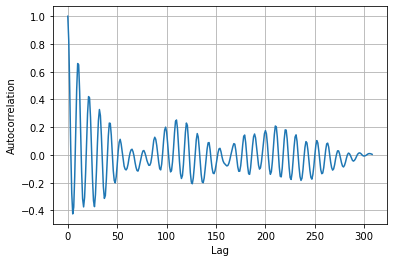

In [403]:
# import needful libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the dataset
data = sm.datasets.sunspots.load_pandas ().data

#  Calculate autocorrelation using numpy
dy = data.SUNACTIVITY - np.mean (data.SUNACTIVITY)
dy_square = np.sum(dy ** 2)

# Cross-correlation
sun_correlated = np.correlate (dy, dy, mode='full')/dy_square
result = sun_correlated[int(len(sun_correlated)/2):]

# Display the Chart
plt.plot(result)

# Display grid
plt.grid(True)

# Add labels
plt.xlabel("Lag")

plt.ylabel("Autocorrelation")
# Display the chart
plt.show ()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

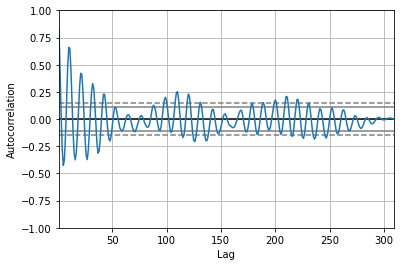

In [404]:
from pandas.plotting import autocorrelation_plot

# Plot using pandas function 
autocorrelation_plot (data.SUNACTIVITY)

NameError: name 'plot' is not defined

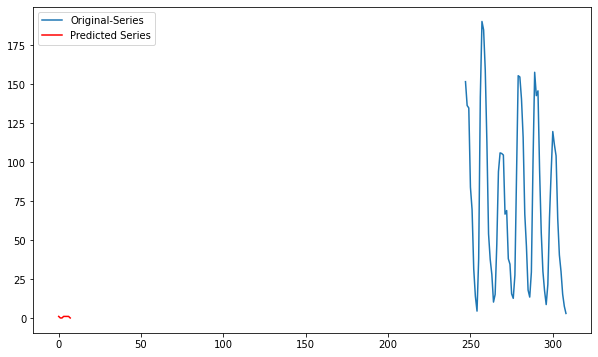

In [405]:
# Setting figure size
plt.figure (figsize=(10,6))

# Plot test data
plt.plot(test.SUNACTIVITY, label='Original-Series')

# Plot predictions
plt.plot (pred, color = 'red', label = 'Predicted Series')

# Add legends
plt.legend ()

# Display the plot
plot.show ()

In [ ]:
# import needful libraries 
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Read the dataset
data = sm.datasets.sunspots.load_pandas ().data
data.drop('YEAR', axis=1, inplace=True)

# Split data into train and test set
train_ratio = 0.8
train = data [:int(train_ratio*len (data))]
test = data [int(train_ratio*len (data)) :]

# AutoRegression Model training
arma_model = ARIMA (train, order=(10, 1, 3))
arma_model = arma_model.fit ()

# make predictions
start_point = len (train)
end_point = start_point + len (test)-1
pred = arma_model.predict (start_point, end_point)

# Calcualte errors
mae = mean_absolute_error (test.SUNACTIVITY, pred)
mse = mean_squared_error (test.SUNACTIVITY, pred)
rmse = sqrt (mse)
print ("MAE:",mae)
print ("MSE:",mse)
print ("EMSE:",rmse)

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Plot test data
plt.plot(test, label='Original-Series')

# Plot predictions
plt.plot (pred, color = 'red', label='Predicted Series')

# Add legends
plt.legend ()

# Display the plot
plt.show ()

In [ ]:
# Import required libraries
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# Create model function
def model (p, t):
    C, p1, f1, phi1, p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) + p3 * np.sin(f3 * t + phi3)

# Create error function
def error (p, y, t):
    return y - model (p, t)

# Create fin function
def fit (y, t):
    p0 = [y.mean (), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params = leastsq(error, p0, args=(y, t)) [0]
    return params

# Load the dataset
data_loader = sm.datasets.sunspots.load_pandas ()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data['YEAR'].values

# Apply and fit the model
cutoff = int (.9 * len (sunspots))
params = fit (sunspots[:cutoff], years[:cutoff])
print("Params", params)

pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]

print ("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print ("Mean absolute error", np.mean(np.abs(actual - pred)))
print ("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/ actual))
mid = (actual + pred)/ 2
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print ("Coefficient of determination", 1 - ((actual - pred) **2).sum () / ((actual - actual.mean ()) ** 2). sum())

In [ ]:
year_range = data_loader.data["YEAR"].values[cutoff:]

# Plot the actual and predicted data points
plt.plot (year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)

# Add labels
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")

# Add legend
plt.legend ()

# Display the chart
plt.show ()


In [ ]:
# Import required library
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

# Read the dataset
data = sm.datasets.sunspots.load_pandas ().data

# Create Sine wave
t = np.linspace(-2 * np.pi, 2 * np.pi, len (data.SUNACTIVITY.values))
mid = np.ptp(data.SUNACTIVITY.values) / 2
sine = mid + mid * np.sin(np.sin (t))

# Compute FFT for Sine wave
sine_fft = np.abs (fftshift (rfft(sine)))
print ("Index of max sine FFT", np.argsort(sine_fft) [-5:])

# Compute FFT for sunspots dataset
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))
print ("Indicies of max sunspots FFT", np.argsort(transformed) [-5:])

# Create subplots
fig, axs = plt.subplots (3, figsize=(12,6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].plot(sine, lw=2, label="Sine")
axs[0].legend ()  # Set legends
axs[1].plot(transformed, label="Transformed Sunspots")
axs[1].legend ()  # Set legends
axs[2].plot(sine_fft, lw=2, label="Transformed Sine")
axs[2].legend ()  # Set legends

# Display the chart
plt.show ()

In [ ]:
# Import required library
import numpy as np
import statsmodels.api as sm
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt

# Read the dataset
data = sm.datasets.sunspots.load_pandas ().data

# Compute FFT
transformed = fftshift (rfft(data.SUNACTIVITY.values))

# Compute Power Spectrum
power = transformed ** 2

# Compute Phase
phase = np.angle(transformed)

# Create subplots
fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].legend()  # Set legends
axs[1].plot(power, label="Power Spectrum")
axs[1].legend ()  # Set legends
axs[2].plot(phase, label = "Phase Spectrum")
axs[2].legend()  # Set legends

# Display the chart
plt.show ()

In [ ]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = data.corr ()

# Plot heatmap on correlation matrix
sns.heatmap (corr, annot=True, cmap='YlGnBu')

# display thr plot
plt.show ()

In [ ]:
# Import pandas module
import pandas as pd

# Create pandas DataFrame
data = pd.DataFrame({'Gender':['F', 'M', 'M', 'F', 'M']})

# Check the top-5 records
data.head()

In [ ]:
# Dummy encoding
encoded_data = pd.get_dummies (data['Gender'])

# Check the top-5 records if the dataframe
encoded_data.head ()

In [ ]:
# Dummy encoding
encoded_data = pd.get_dummies(data['Gender'], drop_first=True)

# Check the top-5 records of the dataframe
encoded_data.head ()

In [ ]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np

# Create X and Y lists
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [9, 10, 12, 16, 22, 28, 40, 58, 102, 200]

# Plot scatter diagram
plt.scatter (X,y, color = 'red')
plt.title ('Polynomial Regression')
plt.xlabel ('X-Axis')
plt.ylabel('y-Axis')

In [ ]:
# import libraries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare dataset
data = pd.DataFrame({"X": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    "y": [9, 10, 12, 16, 22, 28, 40, 58, 102, 200]})

X = data [['X']]
y = data [['y']]

# Apply Polinomial Features
polynomial_reg = PolynomialFeatures (degree = 6)
X_polynomial = polynomial_reg.fit_transform (X)

# Appply Linear Regression Model
linear_reg = LinearRegression ()
linear_reg.fit (X_polynomial, y)
predictions = linear_reg.predict (X_polynomial)

# Plot the results
plt.scatter (X, y, color = 'red')
plt.plot (X, predictions, color = 'red')
plt.title ('Polynomial Regression')
plt.xlabel ('X-Axis')
plt.ylabel ('y-Axis')


In [ ]:
# partition data into training and testing set
from sklearn.model_selectionimport train_test_split

# split train and test set
feature_train, feature_test, target_train, target_test = train_test_split (features, target, test_size=0.3, random_state=1)


In [ ]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score (target_test, predictions_prob)

# Print auc value
print ("Area Under Curve:", auc)

In [ ]:
# Import numpy
import numpy as np

# Import linear algebra module
from scipy import linalg as la

# Create dataset
data = np.array ([[7., 4., 3.],
                 [4., 1., 8.],
                 [6., 3., 5.],
                 [8., 6., 1.],
                 [8., 5., 7.],
                 [7., 2., 9.],
                 [5., 3., 3.],
                 [9., 5., 8.],
                 [7., 4., 5.],
                 [8., 2., 2.]])

# Calculate the covariance matrix
# Center your data
data -= data.mean (axis = 0)
cov = np.cov (data, rowvar = False)

# Calculate eigenvalues and eigenvector of the covariance matrix
evals, evecs = la.eig (cov)

# Multiply the original data matrix with Eigenvector matrix
# Sort the Eigen values and vector and select components
num_components = 2
sorted_key = np.argsort (evals) [::-1][:num_components]
evals, evecs = evals [sorted_key], evecs[:, sorted_key]

print ("Eigenvalues:", evals)
print ("Eigenvector:", evecs)
print ("Sorted and Selected Eigen Values:", evals)
print ("Sorted and Selected Eigen Vector:", evecs)

# Multiply original data and Eigen vector
principal_components = np.dot (data, evecs)
print ("Principal Components:", principal_components)

In [ ]:
# Import pandas and PCA
import pandas as pd

# Import principal component analysis
from sklearn.decomposition import PCA

# Create dataset
data = np.array ([[7., 4., 3.],
                 [4., 1., 8.],
                 [6., 3., 5.],
                 [8., 6., 1.],
                 [8., 5., 7.],
                 [7., 2., 9.],
                 [5., 3., 3.],
                 [9., 5., 8.],
                 [7., 4., 5.],
                 [8., 2., 2.]])

# Create and fit_transformed PCA Model
pca_model = PCA (n_components=2)
components = pca_model.fit_transform (data)
components_df = pd.DataFrame (data = components, columns = ['principal_component_1', 'principal_component_2'])
print (components_df)

In [ ]:
# Import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import K-means
from sklearn.cluster import KMeans

# Create a DataFrame
data = pd.DataFrame ({"X": [12, 15, 18, 10, 8, 9, 12, 20],
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})
wcss_list = []

# Run a loop for different value of number of cluster
for i in range (1, 6):
    # Create and fir the KMeans model
    kmeans_model = KMeans (n_clusters = i, random_state = 123)
    kmeans_model.fit (data)
    # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append (kmeans_model.inertia_)
    
# plot the inertia (WCSS) and number of clusters
plt.plot (range (1, 6), wcss_list, marker='*')

# set title of the plot
plt.title ('Selecting Optimum Number of Clusters using Elbow Method')

# Set x-axis label
plt.xlabel ('Number of Clusters K')

# Set y-axis label
plt.ylabel ('Within-Cluster Sum of Squares (Inertia)')

# Display plot
plt.show ()

In [ ]:
# import pandas'
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# import k-means for performing clustering
from sklearn.metrics import silhouette_score

# Create a DataFrame
data = pd.DataFrame ({"X": [12, 15, 18, 10, 8, 9, 12, 20],
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})
score_list = []

# Run a loop for different value of number of cluster
for i in range (2, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans (n_clusters = i, random_state = 123)
    kmeans_model.fit (data)
    #Make predictions
    pred = kmeans_model.predict (data)
    # Calculate the Silhouette Score
    score = silhouette_score (data, pred, metric='euclidean')
    
    # Add the Silhouette score and number of cluster
    score_list.append (score)
    
# Plot the Silhouette score and number of cluster
plt.bar (range (2, 6), score_list)

# Set title of the plot
plt.title ("Silhouette Score Plot")

# Set x-axis label
plt.xlabel ("Number of Clusters K")

# Set y-axis label
plt.ylabel ("Silhouette Scores")

# Display plot
plt.show ()

In [ ]:
# import pandas
import pandas as pd 

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import K-means
from sklearn.cluster import KMeans

# Create a DataFrame
data = pd.DataFrame ({"X": [12, 15, 18, 10, 8, 9, 12, 20],
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})

# Define number of clusters
num_clusters = 2

# Create and fit the KMeans model
km = KMeans (n_clusters=num_clusters)
km.fit(data)

# Predict the target variable 
pred = km.predict (data)

# Plot the Clusters
plt.scatter (data.X, data.Y, c = pred, marker = "o", cmap = "bwr_r")

# Set title of the plot
plt.title ('K-Means Clustering')

# Set x-axis label
plt.xlabel ('X-Axis Values')

# Set y-axis label
plt.ylabel ('Y-Axis Values')

# Display the plot
plt.show ()

In [ ]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Create a DataFrame 
data = pd.DataFrame ({"X": [12, 15, 18, 10, 8, 9, 12, 20],
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})

# create dendrogram using ward linkage
dendrogram_plot = dendrogram (linkage (data, method = 'ward'))

# Set title of the plot
plt.title ('Hierarchical Clustering: Dendrogram')

# Set x-axis label
plt.xlabel ('Data Items')

# Set y-axis label
plt.ylabel ('Distance')

# Display the plot
plt.show ()

In [ ]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Create a DataFrame
data = pd.DataFrame ({"X": [12, 15, 18, 10, 8, 9, 12, 20],
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})

# Specify number of clusters
num_clusters = 2

# Create agglomerative clustering model
ac = AgglomerativeClustering (n_clusters = num_clusters, linkage = 'ward')

# Fit the Agglomerative Clustering Model
ac.fit (data)

# Predict the target variable 
pred = ac.labels_

# Plot the Clusters
plt.scatter (data.X, data.Y, c=pred, marker="o")

# Set title of thr plot
plt.title ('Agglomerative Clustering')

# Set x-axis label
plt.xlabel ('X-Axis Values')

# Set y-axis label
plt.ylabel ('Y-Axis Values')

# Display the plot
plt.show ()

In [ ]:
# import pandas
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import DBSCAN clustering model
from sklearn.cluster import DBSCAN

# import make_moons dataset
from sklearn.datasets import make_moons

# Generate some ransom moon data
features, label = make_moons (n_samples = 2000)

# Create DBSCAN clustering model
db = DBSCAN ()

# Fit the Spectral Clustering model
db.fit (features)

# Predict the target variable
pred_label = db.labels_

# Plot the Clusters
plt.scatter (features[:, 0], features [:, 1], c=pred_label, marker="o", cmap="bwr_r")

# Set title of the plot
plt.title ('DBSCAN Clustering')

# Set x-axis label
plt.xlabel ('X-Axis Values')

# Set y-axis label
plt.ylabel ('Y-Axis Values')

# Display the plot
plt.show ()

In [ ]:
# import pandas
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Spectral Clustering
from sklearn.cluster import SpectralClustering

# Create a DataFrame
data = pd.DataFrame ({"X": [12, 15, 18, 10, 8, 9, 12, 20],
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})

# Specify number of clusters
num_clusters = 2

# Create Spectral Clustering model
sc = SpectralClustering (num_clusters, affinity='rbf', n_init = 100,
                        assign_labels = 'discretize')

# Fit the Spectral Clustering model
sc.fit (data)

# Predict the target variable
pred = sc.labels_

# Plot the Clusters
plt.scatter (data.X, data.Y, c = pred, marker = "o")

# Set title of the plot
plt.title ('Spectral Clustering')

# Set x-axis label
plt.xlabel ('X-Axis Values')

# Set y-axis label
plt.ylabel ('Y-Axis Values')

# Display the plot
plt.show ()